In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# **Data Visualization**

In [78]:
df = pd.read_csv('final_condo_data.csv')
df.head(10)

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,...,Furnishing_Unfurnished,price_per_sqm,amenities_count,size_category_Large,size_category_Medium,size_category_Small,size_category_Studio,occupancy_demand_High Demand,occupancy_demand_Low Demand,occupancy_demand_Medium Demand
0,1800.0,19.0,1.0,1.0,0.0,1.0,0.0,0.0,4.3,66.5,...,1.0,94.736842,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3000.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,4.3,66.5,...,1.0,250.000000,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3000.0,20.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,1.0,...,1.0,150.000000,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,3250.0,23.0,1.0,1.0,1.0,0.0,0.0,0.0,4.3,66.5,...,1.0,141.304348,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,3300.0,24.0,1.0,1.0,1.0,1.0,0.0,0.0,4.2,163.0,...,1.0,137.500000,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,3400.0,24.0,0.0,1.0,1.0,1.0,0.0,0.0,4.3,66.5,...,1.0,141.666667,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,3600.0,14.0,0.0,1.0,1.0,1.0,0.0,0.0,4.3,66.5,...,1.0,257.142857,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,4200.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,3.9,58.0,...,1.0,221.052632,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,4500.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,4.3,66.5,...,1.0,236.842105,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,5000.0,22.0,1.0,1.0,0.0,0.0,0.0,0.0,4.6,16.0,...,1.0,227.272727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           3000 non-null   float64
 1   Square Area                     3000 non-null   float64
 2   Bedrooms                        3000 non-null   float64
 3   Bathrooms                       3000 non-null   float64
 4   Security                        3000 non-null   float64
 5   Airconditioning                 3000 non-null   float64
 6   Parking                         3000 non-null   float64
 7   Balcony                         3000 non-null   float64
 8   Rating                          3000 non-null   float64
 9   ReviewsCount                    3000 non-null   float64
 10  Swimming pool                   3000 non-null   float64
 11  Multi-Purpose Hall              3000 non-null   float64
 12  Function Rooms                  30

In [80]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].round(1)

median_imputer = SimpleImputer(strategy='median')
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])

In [81]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           3000 non-null   float64
 1   Square Area                     3000 non-null   float64
 2   Bedrooms                        3000 non-null   float64
 3   Bathrooms                       3000 non-null   float64
 4   Security                        3000 non-null   float64
 5   Airconditioning                 3000 non-null   float64
 6   Parking                         3000 non-null   float64
 7   Balcony                         3000 non-null   float64
 8   Rating                          3000 non-null   float64
 9   ReviewsCount                    3000 non-null   float64
 10  Swimming pool                   3000 non-null   float64
 11  Multi-Purpose Hall              3000 non-null   float64
 12  Function Rooms                  30

## **Scatter Plot**

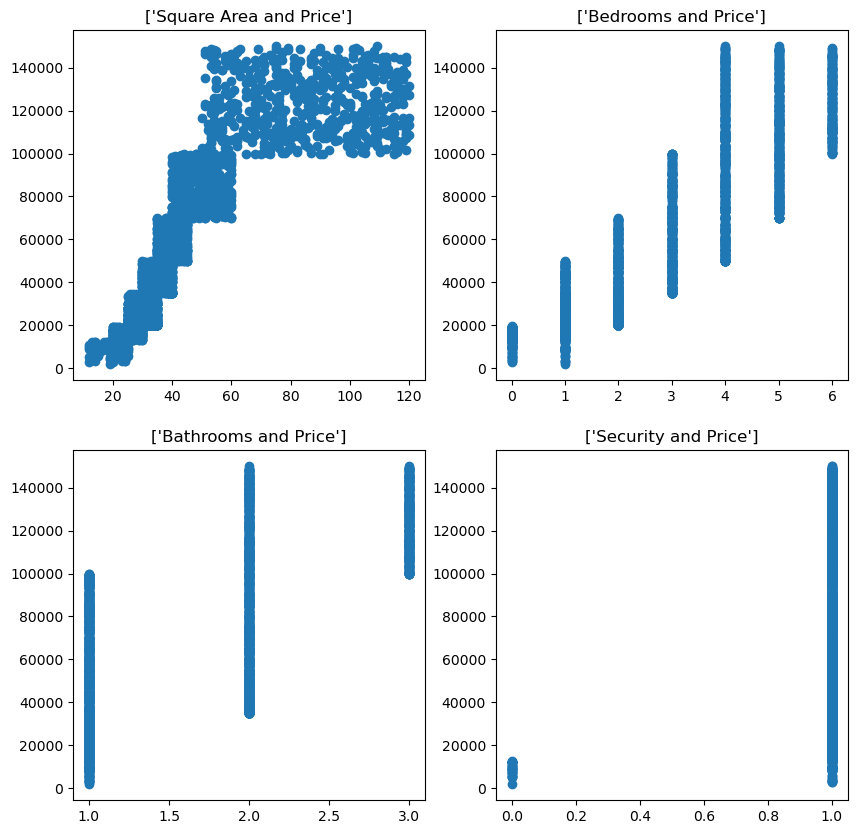

In [82]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Square Area"], df["Price"])
ax[0, 1].scatter(df["Bedrooms"], df["Price"])
ax[1, 0].scatter(df["Bathrooms"], df["Price"])
ax[1, 1].scatter(df["Security"], df["Price"])

ax[0, 0].set_title(["Square Area and Price"])
ax[0, 1].set_title(["Bedrooms and Price"])
ax[1, 0].set_title(["Bathrooms and Price"])
ax[1, 1].set_title(["Security and Price"])

plt.show()

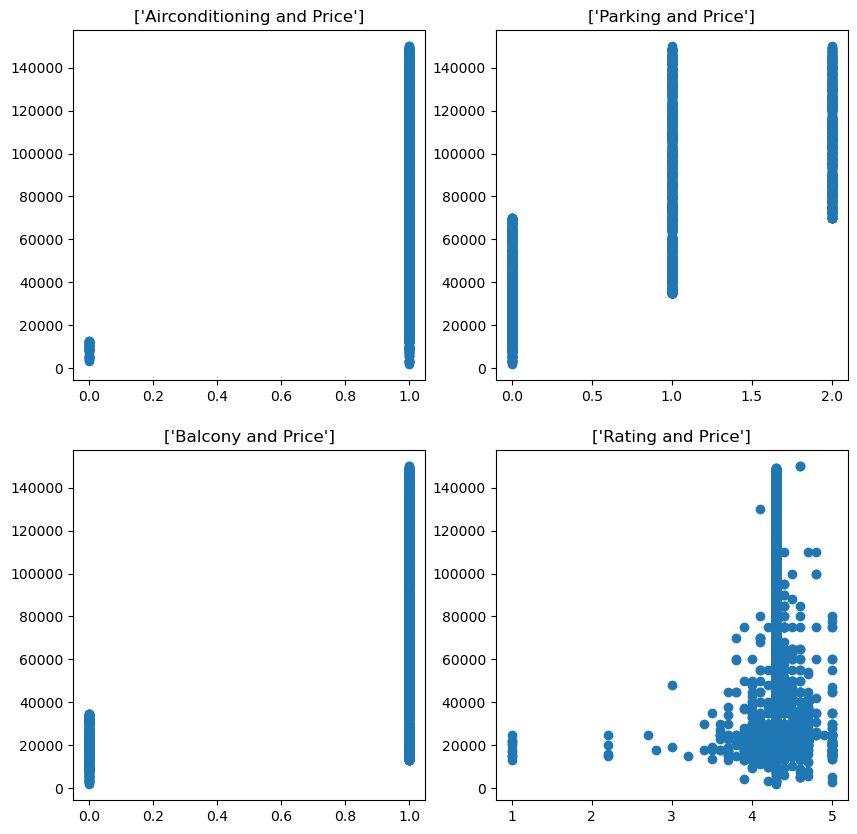

In [83]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Airconditioning"], df["Price"])
ax[0, 1].scatter(df["Parking"], df["Price"])
ax[1, 0].scatter(df["Balcony"], df["Price"])
ax[1, 1].scatter(df["Rating"], df["Price"])

ax[0, 0].set_title(["Airconditioning and Price"])
ax[0, 1].set_title(["Parking and Price"])
ax[1, 0].set_title(["Balcony and Price"])
ax[1, 1].set_title(["Rating and Price"])

plt.show()

Text(0.5, 1.0, "['Function Rooms and Price']")

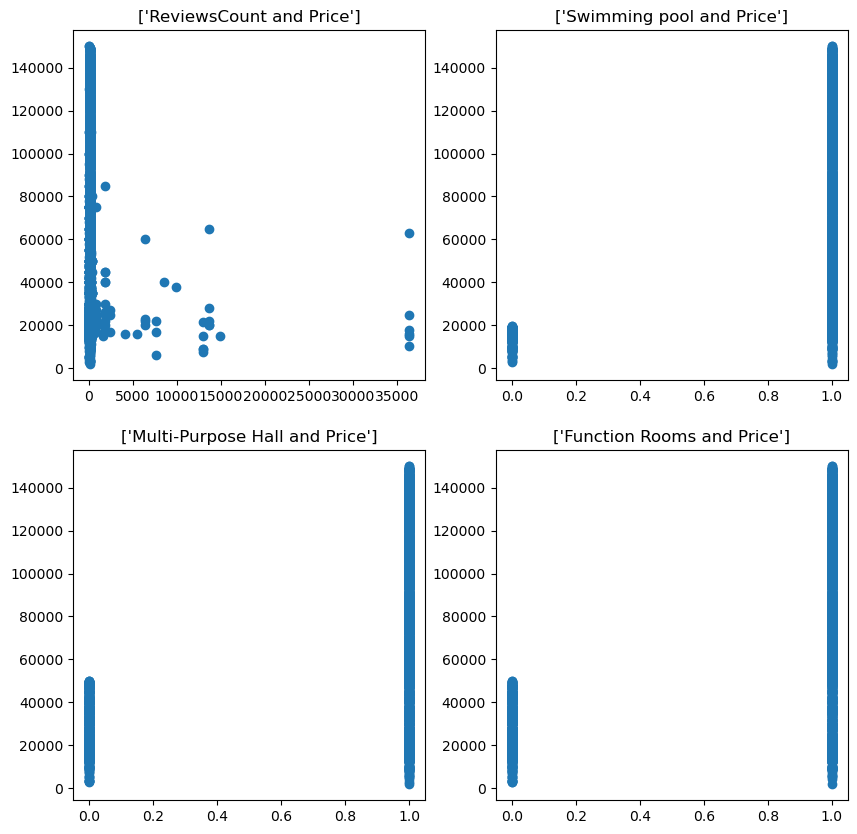

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["ReviewsCount"], df["Price"])
ax[0, 1].scatter(df["Swimming pool"], df["Price"])
ax[1, 0].scatter(df["Multi-Purpose Hall"], df["Price"])
ax[1, 1].scatter(df["Function Rooms"], df["Price"])

ax[0, 0].set_title(["ReviewsCount and Price"])
ax[0, 1].set_title(["Swimming pool and Price"])
ax[1, 0].set_title(["Multi-Purpose Hall and Price"])
ax[1, 1].set_title(["Function Rooms and Price"])

Text(0.5, 1.0, "['Furnishing_Semi Furnished and Price']")

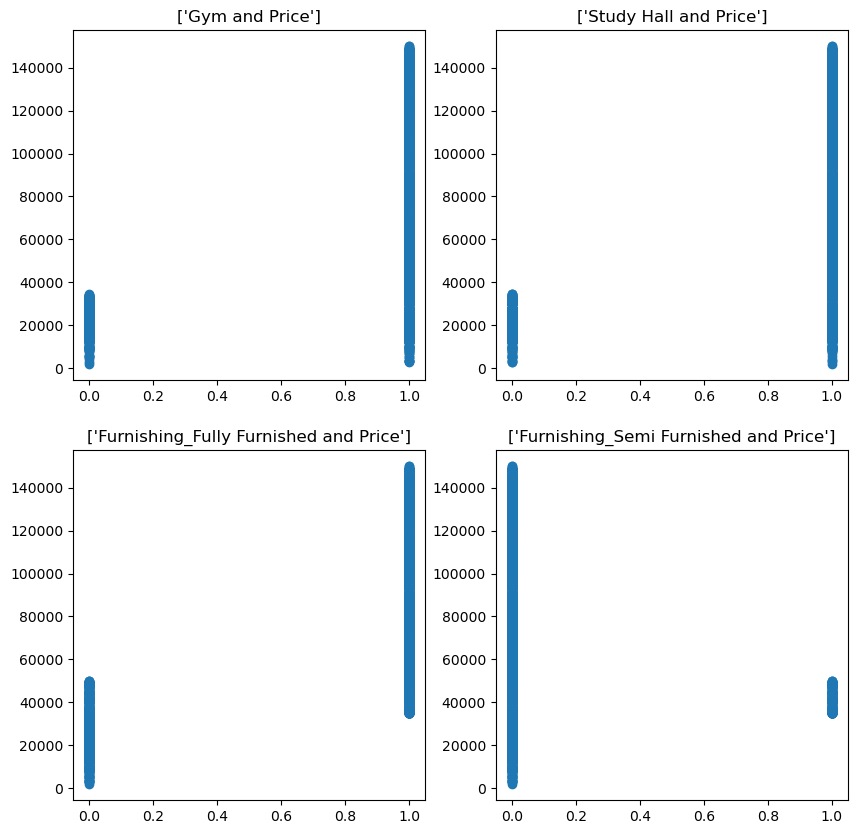

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Gym"], df["Price"])
ax[0, 1].scatter(df["Study Hall"], df["Price"])
ax[1, 0].scatter(df["Furnishing_Fully Furnished"], df["Price"])
ax[1, 1].scatter(df["Furnishing_Semi Furnished"], df["Price"])

ax[0, 0].set_title(["Gym and Price"])
ax[0, 1].set_title(["Study Hall and Price"])
ax[1, 0].set_title(["Furnishing_Fully Furnished and Price"])
ax[1, 1].set_title(["Furnishing_Semi Furnished and Price"])

Text(0.5, 1.0, "['size_category_Large and Price']")

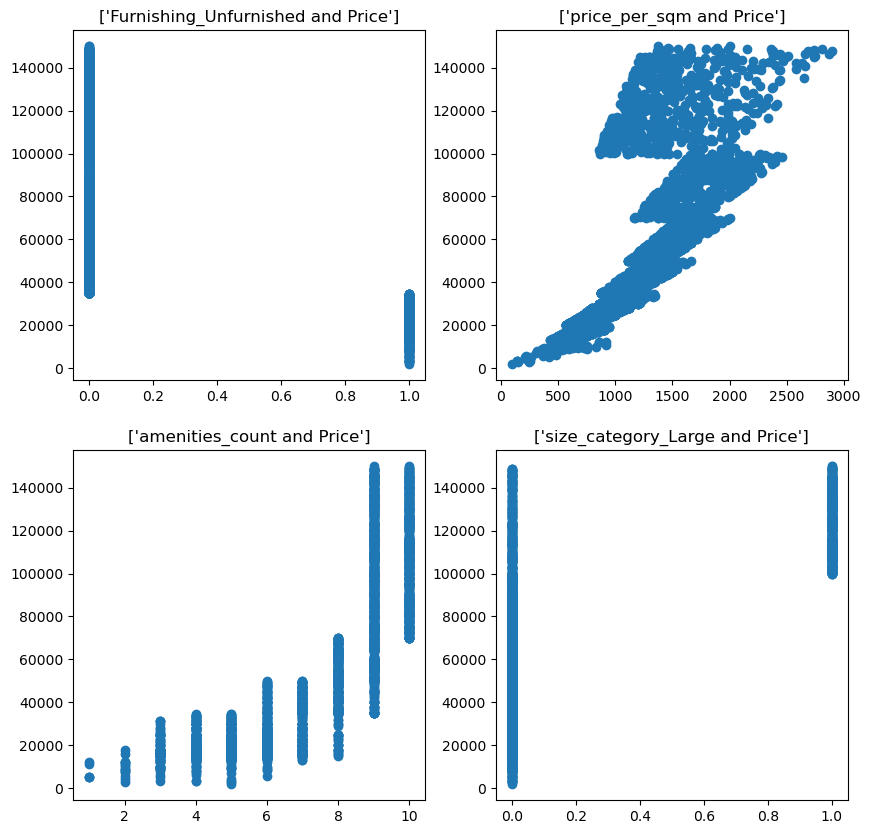

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Furnishing_Unfurnished"], df["Price"])
ax[0, 1].scatter(df["price_per_sqm"], df["Price"])
ax[1, 0].scatter(df["amenities_count"], df["Price"])
ax[1, 1].scatter(df["size_category_Large"], df["Price"])

ax[0, 0].set_title(["Furnishing_Unfurnished and Price"])
ax[0, 1].set_title(["price_per_sqm and Price"])
ax[1, 0].set_title(["amenities_count and Price"])
ax[1, 1].set_title(["size_category_Large and Price"])

Text(0.5, 1.0, "['occupancy_demand_High Demand and Price']")

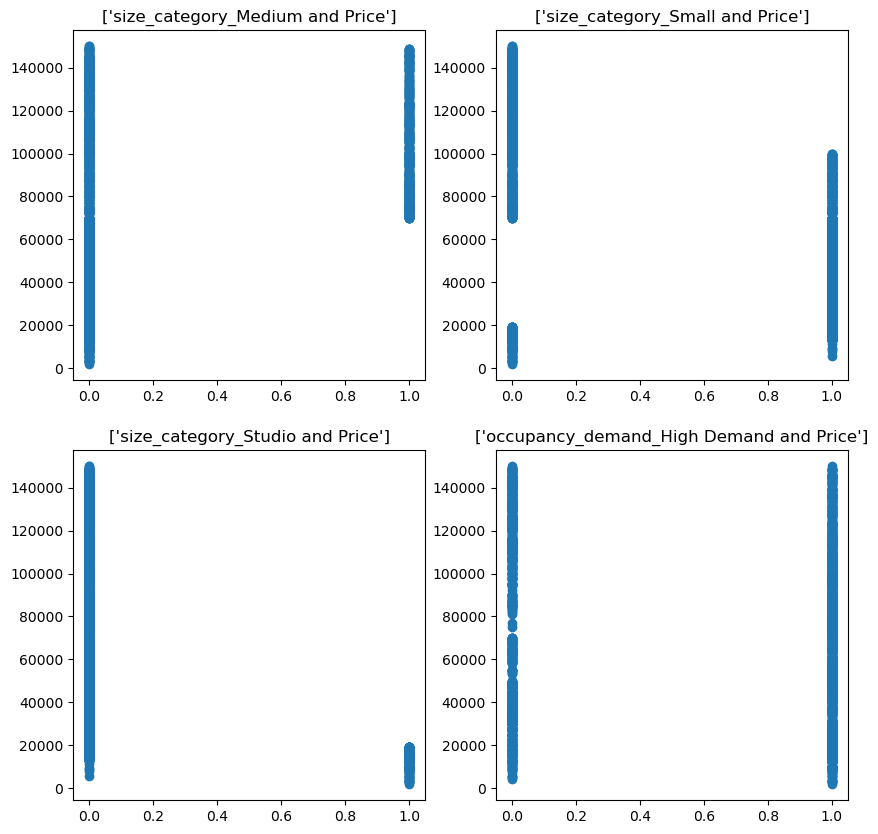

In [87]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["size_category_Medium"], df["Price"])
ax[0, 1].scatter(df["size_category_Small"], df["Price"])
ax[1, 0].scatter(df["size_category_Studio"], df["Price"])
ax[1, 1].scatter(df["occupancy_demand_High Demand"], df["Price"])

ax[0, 0].set_title(["size_category_Medium and Price"])
ax[0, 1].set_title(["size_category_Small and Price"])
ax[1, 0].set_title(["size_category_Studio and Price"])
ax[1, 1].set_title(["occupancy_demand_High Demand and Price"])

Text(0.5, 1.0, 'occupancy_demand_Low Demand and Price')

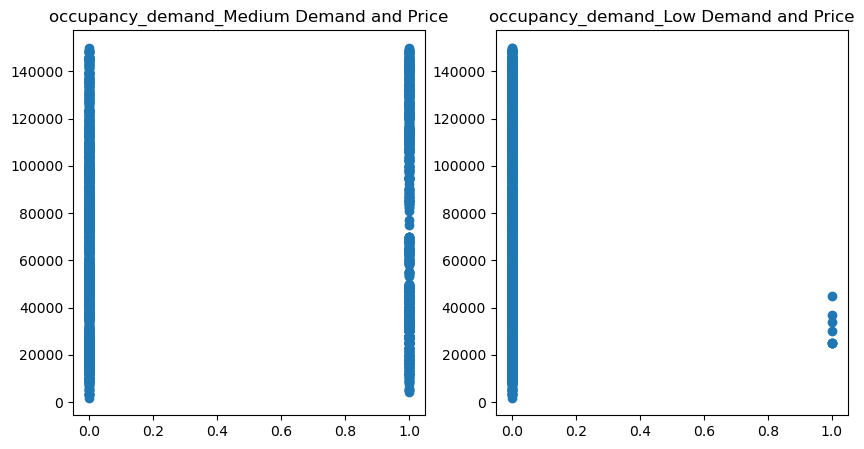

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(df["occupancy_demand_Medium Demand"], df["Price"])
ax[1].scatter(df["occupancy_demand_Low Demand"], df["Price"])

ax[0].set_title("occupancy_demand_Medium Demand and Price")
ax[1].set_title("occupancy_demand_Low Demand and Price")

## **Correlation Matrix**

In [89]:
# sns.set_palette('colorblind')
# sns.pairplot(data=df, height=2)

In [90]:
correlation = df.corr()
correlation

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,...,Furnishing_Unfurnished,price_per_sqm,amenities_count,size_category_Large,size_category_Medium,size_category_Small,size_category_Studio,occupancy_demand_High Demand,occupancy_demand_Low Demand,occupancy_demand_Medium Demand
Price,1.000000,0.873768,0.877126,0.758712,0.121490,0.125553,0.798030,0.470410,0.030708,-0.074216,...,-0.751481,0.761332,0.810581,0.646363,0.457136,-0.602298,-0.317888,-0.255202,-0.033512,0.259825
Square Area,0.873768,1.000000,0.767092,0.722878,0.112808,0.111808,0.688707,0.376251,0.019301,-0.063726,...,-0.594947,0.386606,0.671767,0.861705,0.235635,-0.607164,-0.295305,-0.200398,-0.037451,0.205314
Bedrooms,0.877126,0.767092,1.000000,0.658929,0.133646,0.137395,0.753001,0.456731,0.037686,-0.076243,...,-0.735787,0.709411,0.789560,0.522158,0.438167,-0.467270,-0.376397,-0.176318,-0.018037,0.178922
Bathrooms,0.758712,0.722878,0.658929,1.000000,0.074306,0.076691,0.584117,0.377937,0.026647,-0.060025,...,-0.615432,0.499717,0.601456,0.593591,0.281507,-0.495741,-0.218298,-0.237429,-0.037602,0.242472
Security,0.121490,0.112808,0.133646,0.074306,1.000000,0.558066,0.083864,0.196610,-0.017145,-0.123680,...,-0.120738,0.146216,0.213934,0.039499,0.040827,0.139149,-0.340388,0.090880,0.005284,-0.091759
Airconditioning,0.125553,0.111808,0.137395,0.076691,0.558066,1.000000,0.086557,0.202921,-0.008609,-0.034255,...,-0.124614,0.156673,0.226582,0.040767,0.042138,0.123520,-0.316499,0.098396,0.005453,-0.099317
Parking,0.798030,0.688707,0.753001,0.584117,0.083864,0.086557,1.000000,0.426552,0.032566,-0.063506,...,-0.694598,0.645729,0.821727,0.457804,0.467380,-0.518052,-0.246379,-0.180571,-0.042439,0.186003
Balcony,0.470410,0.376251,0.456731,0.377937,0.196610,0.202921,0.426552,1.000000,0.010383,-0.039405,...,-0.614100,0.490079,0.649266,0.200901,0.207657,-0.113571,-0.308413,-0.104999,-0.004718,0.105855
Rating,0.030708,0.019301,0.037686,0.026647,-0.017145,-0.008609,0.032566,0.010383,1.000000,0.063272,...,-0.061053,0.047323,0.037603,0.002359,0.009444,0.017294,-0.044658,0.194843,-0.136332,-0.179693
ReviewsCount,-0.074216,-0.063726,-0.076243,-0.060025,-0.123680,-0.034255,-0.063506,-0.039405,0.063272,1.000000,...,0.075608,-0.072305,-0.084645,-0.035406,-0.035675,0.026740,0.041550,0.021915,-0.002198,-0.021727


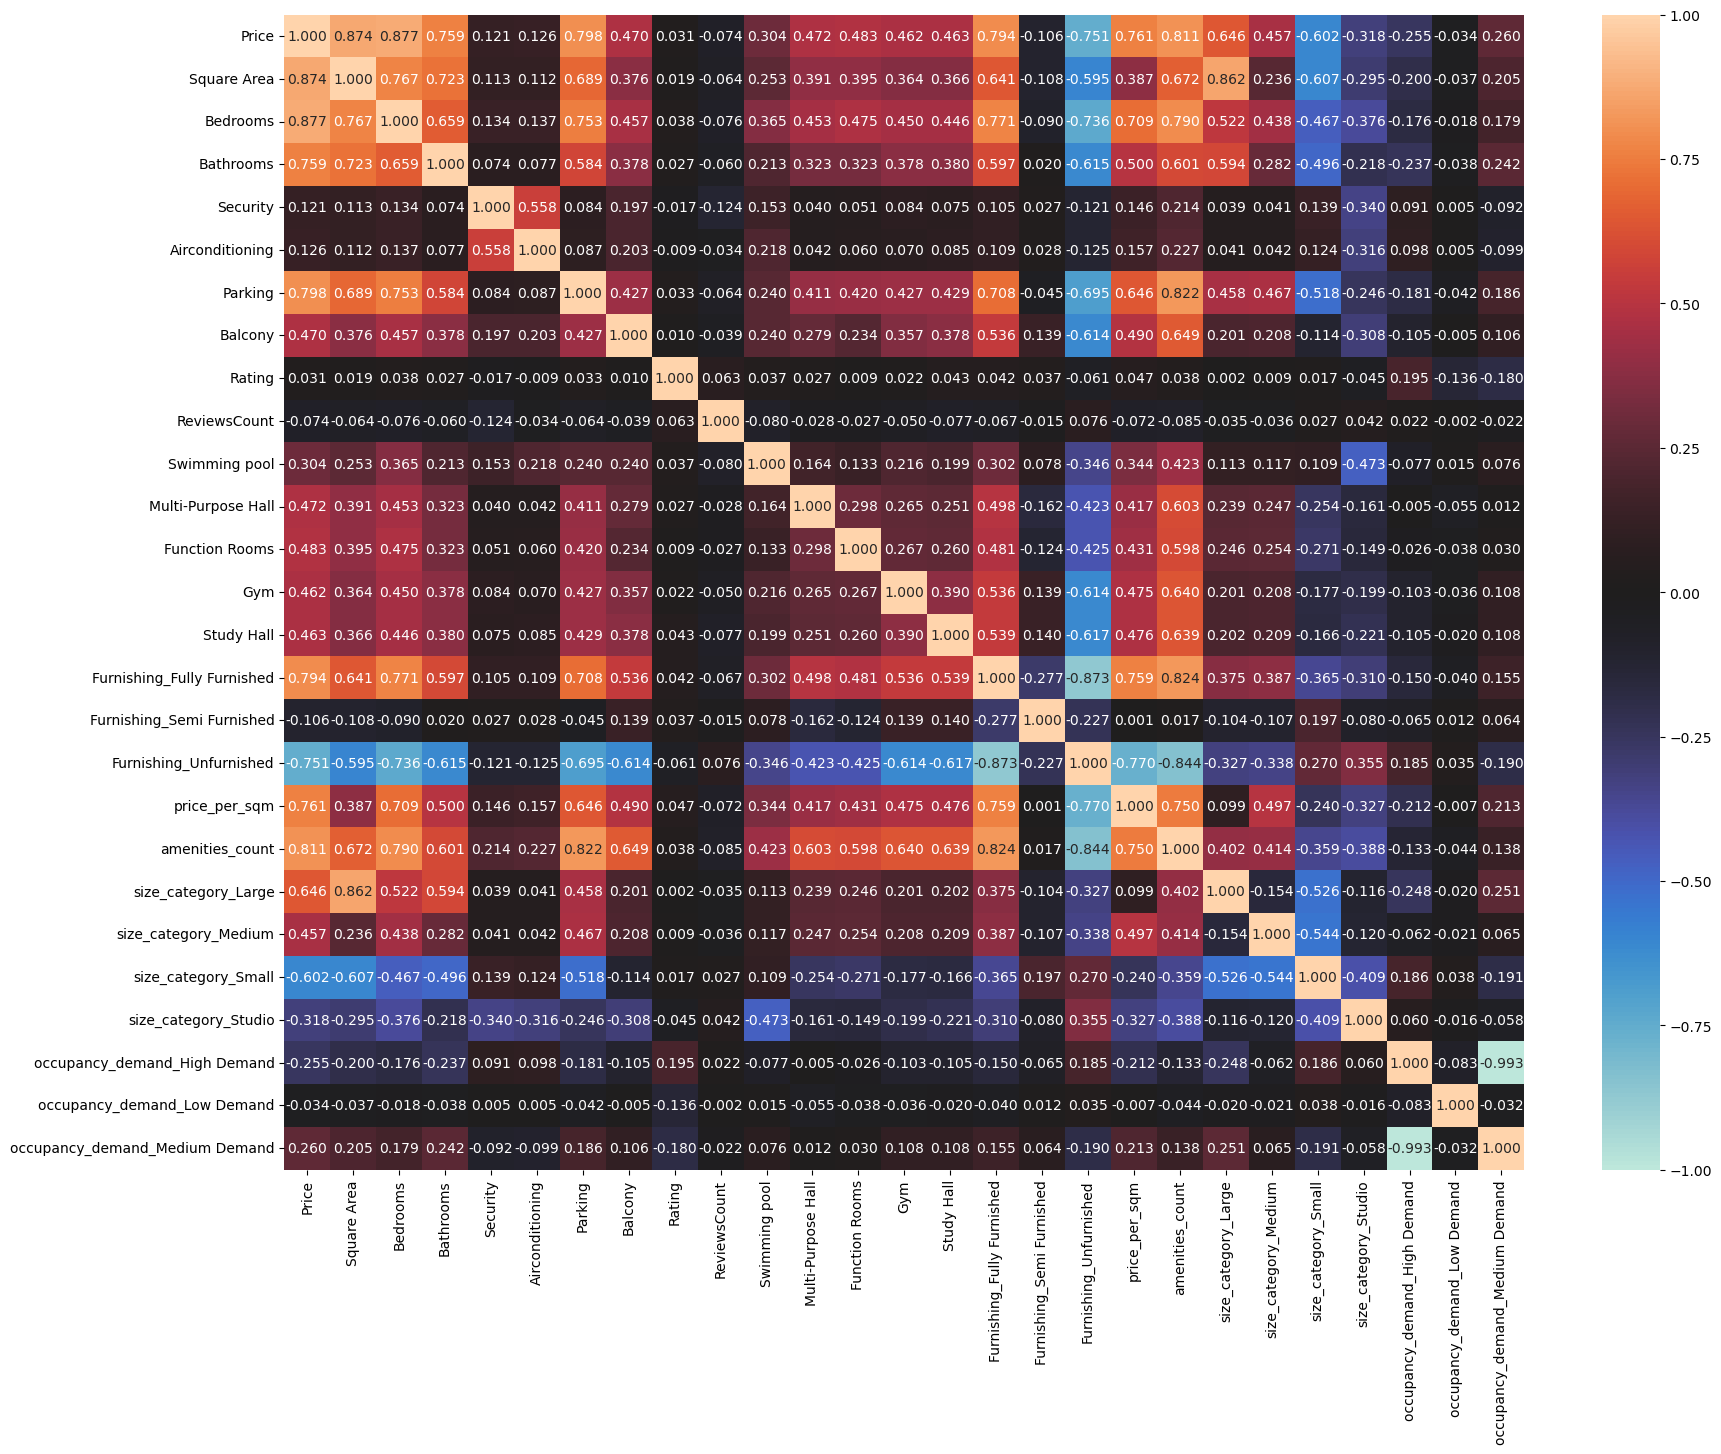

In [91]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0, fmt=".3f")
plt.show()

## **Calculating p-value and r-squared**

In [92]:
independent_variables = ['Square Area',
                         'Bedrooms',
                         'Bathrooms',
                         'Security',
                         'Airconditioning',
                         'Parking',
                         'Balcony',
                         'Rating',
                         'ReviewsCount',
                         'Swimming pool',
                         'Multi-Purpose Hall',
                         'Function Rooms',
                         'Gym',
                         'Study Hall',
                         'Furnishing_Fully Furnished',
                         'Furnishing_Semi Furnished',
                         'Furnishing_Unfurnished',
                         'price_per_sqm',
                         'amenities_count',
                         'size_category_Large',
                         'size_category_Medium',
                         'size_category_Small',
                         'size_category_Studio',
                         'occupancy_demand_High Demand',
                         'occupancy_demand_Low Demand',
                         'occupancy_demand_Medium Demand']

results_list = []

for col in independent_variables:
    result = pearsonr(df[col], df["Price"])
    results_list.append({
        "Independent Variable": col,
        "Correlation Coefficient": result[0],
        "R-squared": result[0]**2,
        "P-value": result[1]
    })

results_df = pd.DataFrame(results_list)
display(results_df)

,Independent Variable,Correlation Coefficient,R-squared,P-value
0,Square Area,0.873768,0.763470,0.000000e+00
1,Bedrooms,0.877126,0.769350,0.000000e+00
2,Bathrooms,0.758712,0.575644,0.000000e+00
3,Security,0.121490,0.014760,2.451052e-11
4,Airconditioning,0.125553,0.015764,5.153372e-12
5,Parking,0.798030,0.636852,0.000000e+00
6,Balcony,0.470410,0.221285,4.641748e-165
7,Rating,0.030708,0.000943,9.264273e-02
8,ReviewsCount,-0.074216,0.005508,4.723196e-05
9,Swimming pool,0.304336,0.092620,2.537859e-65


# **Model Training**
### Multiple Linear Regression

## **Model 1**
### All Features

In [111]:
x = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Security',
        'Airconditioning',
        'Parking',
        'Balcony',
        'Rating',
        'ReviewsCount',
        'Swimming pool',
        'Multi-Purpose Hall',
        'Function Rooms',
        'Gym',
        'Study Hall',
        'Furnishing_Fully Furnished',
        'Furnishing_Semi Furnished',
        'Furnishing_Unfurnished',
        'price_per_sqm',
        'amenities_count',
        'size_category_Large',
        'size_category_Medium',
        'size_category_Small',
        'size_category_Studio',
        'occupancy_demand_High Demand',
        'occupancy_demand_Low Demand',
        'occupancy_demand_Medium Demand']]
x = sm.add_constant(x)
y = df['Price']

In [112]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  -27844.655917170785
Coefficient:  [ 3.90436665e-10  9.10066927e+02  2.06666405e+02  1.98620563e+03
 -2.58791163e+03 -2.88501065e+03  1.19141658e+03  7.28954307e+02
 -5.94918235e+02  3.09357429e-02 -1.65954268e+03  1.12152366e+03
  9.08821339e+02  1.00419361e+03  1.06616522e+03 -2.44912155e+03
 -1.97764988e+03  4.42677143e+03  4.71846606e+01 -1.11139024e+03
  1.03482717e+04  3.99205054e+03 -8.16072629e+03 -6.17959596e+03
  1.82097768e+03 -3.00751533e+03  1.18653765e+03]


In [113]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.007e+04
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:19:54   Log-Likelihood:                -29565.
No. Observations:                3000   AIC:                         5.918e+04
Df Residuals:                    2977   BIC:                         5.931e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.453e+04   1037.987    -13.996      0.000   -1.66e+04   -1.25e+04
Square Area                      910.0669     14.605     62.312      0.000     881.430     938.704
Bedrooms                         206.6664    112.584      1.836      0.067     -14.083     427.416
Bathrooms                       1986.2056    202.636      9.802      0.000    1588.885    2383.527
Security                       -2587.9116    995.927     -2.598      0.009   -4540.688    -635.136
Airconditioning                -2885.0106    967.914     -2.981      0.003   -4782.859    -987.162
Parking                         1191.4166    215.004      5.541      0.000     769.846    1612.987
Balcony                          728.9543    282.190      2.583      0.010     175.647    1282.261
Rating                          -594.9182    314.476     -1.892      0.059   -1211.531      21.694
ReviewsCount                       0.0309      0.046      0.671      0.502      -0.059       0.121
Swimming pool                  -1659.5427    356.516     -4.655      0.000   -2358.585    -960.500
Multi-Purpose Hall              1121.5237    231.141      4.852      0.000     668.312    1574.735
Function Rooms                   908.8213    229.196      3.965      0.000     459.423    1358.220
Gym                             1004.1936    266.962      3.762      0.000     480.745    1527.642
Study Hall                      1066.1652    264.349      4.033      0.000     547.839    1584.491
Furnishing_Fully Furnished     -7291.6704    464.913    -15.684      0.000   -8203.255   -6380.086
Furnishing_Semi Furnished      -6820.1987    460.596    -14.807      0.000   -7723.318   -5917.080
Furnishing_Unfurnished          -415.7774    358.824     -1.159      0.247   -1119.345     287.791
price_per_sqm                     47.1847      0.390    120.922      0.000      46.420      47.950
amenities_count                -1111.3902    123.838     -8.975      0.000   -1354.206    -868.574
size_category_Large             6716.3601    769.272      8.731      0.000    5208.002    8224.719
size_category_Medium             360.1389    390.517      0.922      0.356    -405.571    1125.849
size_category_Small            -1.179e+04    331.673    -35.555      0.000   -1.24e+04   -1.11e+04
size_category_Studio           -9811.5076    429.912    -22.822      0.000   -1.07e+04   -8968.553
occupancy_demand_High Demand   -3021.5712    628.245     -4.810      0.000   -4253.409   -1789.733
occupancy_demand_Low Demand    -7850.0642   1216.239     -6.454      0.000   -1.02e+04   -5465.310
occupancy_demand_Medium Demand -3656.0112    592.354     -6.172      0.000   -4817.476   -2494.547
==============================================================================
Omnibus:                      164.

In [114]:
print(oslmod.rsquared)

0.9867414565015341


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1801,108241.0,104628.889633
1190,37083.0,38076.450505
1817,72816.0,69287.194425
251,16000.0,19597.951876
2505,82573.0,85280.527201
1117,30000.0,31548.038899
1411,107698.0,119776.293476
2113,78000.0,75117.331918
408,18000.0,14077.954096
2579,56479.0,54256.179270


In [116]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  12410844701.315334


## **Model 2**
### Excluding Rating and ReviewCounts

In [117]:
x = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Security',
        'Airconditioning',
        'Parking',
        'Balcony',
        'Swimming pool',
        'Multi-Purpose Hall',
        'Function Rooms',
        'Gym',
        'Study Hall',
        'Furnishing_Fully Furnished',
        'Furnishing_Semi Furnished',
        'Furnishing_Unfurnished',
        'price_per_sqm',
        'amenities_count',
        'size_category_Large',
        'size_category_Medium',
        'size_category_Small',
        'size_category_Studio',
        'occupancy_demand_High Demand',
        'occupancy_demand_Low Demand',
        'occupancy_demand_Medium Demand']]
x = sm.add_constant(x)
y = df['Price']

In [118]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  -30342.66423422019
Coefficient:  [    0.           911.06745235   208.59546633  1984.84934131
 -2609.40718011 -2806.56885632  1183.40647942   738.50550474
 -1694.1358715   1119.7542115    915.05917898  1006.36545757
  1046.13477789 -2450.2436788  -2005.31017148  4455.55385027
    47.14056021 -1100.88629784 10272.99114139  3992.98369074
 -8137.75900938 -6128.21582275  1633.29591839 -2723.36482998
  1090.06891158]


In [119]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:22:12   Log-Likelihood:                -29567.
No. Observations:                3000   AIC:                         5.918e+04
Df Residuals:                    2979   BIC:                         5.930e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.583e+04    755.488    -20.955      0.000   -1.73e+04   -1.43e+04
Square Area                      911.0675     14.595     62.421      0.000     882.449     939.686
Bedrooms                         208.5955    112.607      1.852      0.064     -12.200     429.391
Bathrooms                       1984.8493    202.697      9.792      0.000    1587.409    2382.290
Security                       -2609.4072    988.375     -2.640      0.008   -4547.373    -671.441
Airconditioning                -2806.5689    966.126     -2.905      0.004   -4700.911    -912.227
Parking                         1183.4065    214.697      5.512      0.000     762.438    1604.375
Balcony                          738.5055    281.787      2.621      0.009     185.989    1291.022
Swimming pool                  -1694.1359    356.143     -4.757      0.000   -2392.448    -995.824
Multi-Purpose Hall              1119.7542    230.845      4.851      0.000     667.122    1572.386
Function Rooms                   915.0592    228.898      3.998      0.000     466.246    1363.873
Gym                             1006.3655    266.807      3.772      0.000     483.220    1529.511
Study Hall                      1046.1348    264.218      3.959      0.000     528.067    1564.202
Furnishing_Fully Furnished     -7727.2288    399.274    -19.353      0.000   -8510.109   -6944.349
Furnishing_Semi Furnished      -7282.2953    386.087    -18.862      0.000   -8039.320   -6525.271
Furnishing_Unfurnished          -821.4312    281.727     -2.916      0.004   -1373.831    -269.032
price_per_sqm                     47.1406      0.390    120.976      0.000      46.377      47.905
amenities_count                -1100.8863    123.087     -8.944      0.000   -1342.231    -859.542
size_category_Large             6315.2523    736.548      8.574      0.000    4871.059    7759.446
size_category_Medium              35.2449    347.302      0.101      0.919    -645.731     716.221
size_category_Small             -1.21e+04    287.228    -42.111      0.000   -1.27e+04   -1.15e+04
size_category_Studio           -1.009e+04    404.738    -24.920      0.000   -1.09e+04   -9292.361
occupancy_demand_High Demand   -3643.6892    530.100     -6.874      0.000   -4683.089   -2604.289
occupancy_demand_Low Demand    -8000.3499   1213.486     -6.593      0.000   -1.04e+04   -5620.994
occupancy_demand_Medium Demand -4186.9162    517.701     -8.088      0.000   -5202.004   -3171.828
==============================================================================
Omnibus:                      162.473   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.784
Skew:                          -0.008   Prob(JB):                    1.95e

In [120]:
print(oslmod.rsquared)

0.9867241790319805


In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1801,108241.0,104705.300871
1190,37083.0,38030.316888
1817,72816.0,69275.468494
251,16000.0,19484.734353
2505,82573.0,85255.635268
1117,30000.0,31597.625071
1411,107698.0,119836.765326
2113,78000.0,75512.452598
408,18000.0,13937.406191
2579,56479.0,54244.284328


In [122]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  12412027220.096191


## **Model 3**
### Excluding Features with <50% r-squared

In [123]:
x = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Parking',
        'Furnishing_Fully Furnished',
        'Furnishing_Semi Furnished',
        'Furnishing_Unfurnished',
        'price_per_sqm',
        'amenities_count',
        'size_category_Large',
        'size_category_Medium',
        'size_category_Small',
        'size_category_Studio',
        'occupancy_demand_High Demand',
        'occupancy_demand_Low Demand',
        'occupancy_demand_Medium Demand']]
x = sm.add_constant(x)
y = df['Price']

In [124]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  -36767.392168091064
Coefficient:  [    0.           903.34278146   176.68920985  2009.96759399
   679.82353589 -2012.15919179 -2062.15327485  4074.31246663
    46.77105182  -488.903355   10107.02251755  3720.81686331
 -8699.31546075 -5128.52392011  1707.32866992 -2977.93065451
  1270.60198459]


In [125]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.652e+04
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:23:47   Log-Likelihood:                -29615.
No. Observations:                3000   AIC:                         5.926e+04
Df Residuals:                    2986   BIC:                         5.934e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.918e+04    624.212    -30.732      0.000   -2.04e+04    -1.8e+04
Square Area                      903.3428     14.777     61.134      0.000     874.370     932.316
Bedrooms                         176.6892    113.223      1.561      0.119     -45.313     398.691
Bathrooms                       2009.9676    205.529      9.780      0.000    1606.976    2412.960
Parking                          679.8235    228.630      2.973      0.003     231.535    1128.113
Furnishing_Fully Furnished     -8406.4883    386.922    -21.727      0.000   -9165.149   -7647.827
Furnishing_Semi Furnished      -8456.4823    349.962    -24.164      0.000   -9142.674   -7770.291
Furnishing_Unfurnished         -2320.0166    198.160    -11.708      0.000   -2708.561   -1931.472
price_per_sqm                     46.7711      0.392    119.406      0.000      46.003      47.539
amenities_count                 -488.9034    104.027     -4.700      0.000    -692.875    -284.932
size_category_Large             5311.2757    734.435      7.232      0.000    3871.226    6751.325
size_category_Medium           -1074.9299    325.510     -3.302      0.001   -1713.176    -436.683
size_category_Small             -1.35e+04    246.882    -54.662      0.000    -1.4e+04    -1.3e+04
size_category_Studio           -9924.2707    405.552    -24.471      0.000   -1.07e+04   -9129.081
occupancy_demand_High Demand   -4687.0004    514.566     -9.109      0.000   -5695.941   -3678.060
occupancy_demand_Low Demand    -9372.2597   1219.841     -7.683      0.000   -1.18e+04   -6980.445
occupancy_demand_Medium Demand -5123.7271    509.108    -10.064      0.000   -6121.965   -4125.489
==============================================================================
Omnibus:                      142.800   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.908
Skew:                           0.041   Prob(JB):                    2.80e-109
Kurtosis:                       4.998   Cond. No.                     2.92e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
print(oslmod.rsquared)

0.9862885891582405


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1801,108241.0,104859.934738
1190,37083.0,38966.585599
1817,72816.0,69193.255720
251,16000.0,19111.562164
2505,82573.0,85387.878999
1117,30000.0,32528.206598
1411,107698.0,120006.632786
2113,78000.0,75312.737338
408,18000.0,13628.765468
2579,56479.0,54233.721427


In [110]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  81502976718.17001


# **Model Training**
### Logistic Regression

## **Model 1**
### All features